In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = pd.read_csv('../data/AXJO-8-Aug-2015-3-Aug-2020.csv')
df = data[['Date', 'Close']]
df.insert(2, 'Movement', 0.0)
df.insert(3, 'MovementPercent', 0.0)

print(df)

            Date        Close  Movement  MovementPercent
0     2015-08-03  5679.299805       0.0              0.0
1     2015-08-04  5697.899902       0.0              0.0
2     2015-08-05  5674.000000       0.0              0.0
3     2015-08-06  5610.100098       0.0              0.0
4     2015-08-07  5474.799805       0.0              0.0
...          ...          ...       ...              ...
1263  2020-07-28  6020.500000       0.0              0.0
1264  2020-07-29  6006.399902       0.0              0.0
1265  2020-07-30  6051.100098       0.0              0.0
1266  2020-07-31  5927.799805       0.0              0.0
1267  2020-08-03  5926.100098       0.0              0.0

[1268 rows x 4 columns]


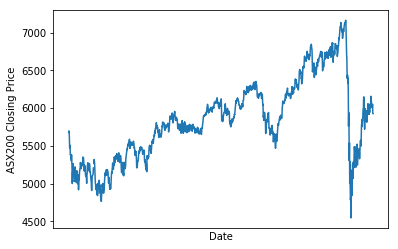

In [3]:
# Plot closing prices

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.xticks([])
plt.ylabel('ASX200 Closing Price')
plt.show()

In [4]:
# Calculate movement

row_count = len(df.index)

for i in range(1, row_count):
    df.at[i, 'Movement'] = df.Close.iloc[i] - df.Close.iloc[i-1]
    df.at[i, 'MovementPercent'] = df.Movement.iloc[i] / df.Close.iloc[i-1] * 100

df = df.drop([0])

print(df)

            Date        Close    Movement  MovementPercent
1     2015-08-04  5697.899902   18.600097         0.327507
2     2015-08-05  5674.000000  -23.899902        -0.419451
3     2015-08-06  5610.100098  -63.899902        -1.126188
4     2015-08-07  5474.799805 -135.300293        -2.411727
5     2015-08-10  5509.200195   34.400390         0.628341
...          ...          ...         ...              ...
1263  2020-07-28  6020.500000  -23.700195        -0.392115
1264  2020-07-29  6006.399902  -14.100098        -0.234201
1265  2020-07-30  6051.100098   44.700196         0.744209
1266  2020-07-31  5927.799805 -123.300293        -2.037651
1267  2020-08-03  5926.100098   -1.699707        -0.028673

[1267 rows x 4 columns]


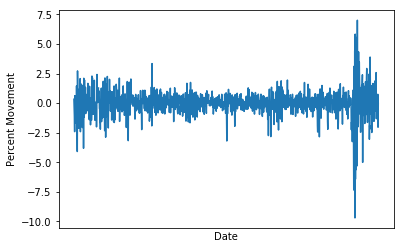

In [5]:
# Plot movement

plt.plot(df.Date, df.MovementPercent)
plt.xlabel('Date')
plt.xticks([])
plt.ylabel('Percent Movement')
plt.show()

0.008658499705430601 1.1772951424812295


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


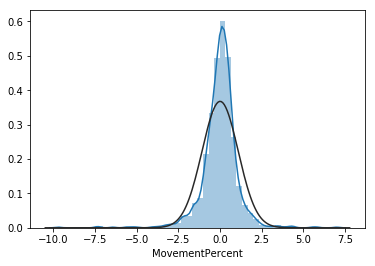

In [6]:
# Parameter estimation

mean = np.mean(df.MovementPercent)
var = np.var(df.MovementPercent)
print(mean, var)

sns.distplot(df.MovementPercent.dropna(), fit=stats.norm)